In [11]:
# Import necessary modules and functions from other Python files in the project
from utils import (
    torch,  # PyTorch library
    is_cuda_available,  # Function to check if CUDA is available
    get_device,  # Function to get the device (CPU or GPU) to be used for training
    train_loader,  # Data loader for the training dataset
    test_loader  # Data loader for the test dataset
)

from model import (
    nn,  # PyTorch's neural network module
    Net,  # Custom neural network model,
    F
)

import torch.optim as optim  # PyTorch's optimization module

In [3]:
print("CUDA Available?", is_cuda_available())
device = get_device()

CUDA Available? True


This code snippet is used to visualize a batch of images from the MNIST dataset. It imports the `matplotlib` library to plot the images and `train_loader` to get a batch of images and their corresponding labels. It then iterates over the batch and plots each image with its label as the title. This code can be used to verify that the data is being loaded correctly and to get a sense of what the images in the dataset look like.

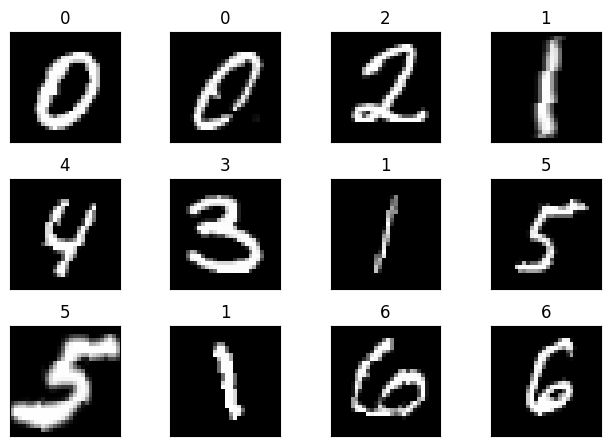

In [4]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [5]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

This code snippet defines two functions `train` and `test` that are used to train and test a PyTorch model on a given dataset. The `train` function takes as input the model, device, train loader, optimizer, and criterion and trains the model on the given dataset. The function iterates over the batches in the train loader, calculates the loss, backpropagates the gradients, and updates the weights of the model. The function also calculates the accuracy of the model on the training dataset and appends it to a list. The `test` function takes as input the model, device, test loader, and criterion and tests the model on the given dataset. The function iterates over the batches in the test loader, calculates the loss and accuracy of the model on the test dataset, and prints the results. These functions are used to train and test the model in the main script.

In [6]:

from tqdm import tqdm

def GetCorrectPredCount(pPrediction, pLabels):
  return pPrediction.argmax(dim=1).eq(pLabels).sum().item()

def train(model, device, train_loader, optimizer, criterion):
  model.train()
  pbar = tqdm(train_loader)

  train_loss = 0
  correct = 0
  processed = 0

  for batch_idx, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()

    # Predict
    pred = model(data)

    # Calculate loss
    loss = criterion(pred, target)
    train_loss+=loss.item()

    # Backpropagation
    loss.backward()
    optimizer.step()
    
    correct += GetCorrectPredCount(pred, target)
    processed += len(data)

    pbar.set_description(desc= f'Train: Loss={loss.item():0.4f} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')

  train_acc.append(100*correct/processed)
  train_losses.append(train_loss/len(train_loader))

def test(model, device, test_loader, criterion):
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)

            output = model(data)
            test_loss += criterion(output, target, reduction='sum').item()  # sum up batch loss

            correct += GetCorrectPredCount(output, target)


    test_loss /= len(test_loader.dataset)
    test_acc.append(100. * correct / len(test_loader.dataset))
    test_losses.append(test_loss)

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
     

This code snippet trains a PyTorch neural network model on the MNIST dataset. It first creates an instance of the `Net` class and moves it to the device (CPU or GPU) specified by the `device` variable. It then defines an optimizer and a learning rate scheduler for the model. The `criterion` variable is set to `nn.CrossEntropyLoss()`, which is the loss function used for multi-class classification problems. The `num_epochs` variable is set to 20, which is the number of times the model will be trained on the entire dataset. The `for` loop iterates over the epochs and calls the `train` and `test` functions to train and test the model on the training and test datasets, respectively. The learning rate scheduler is also called at the end of each epoch to adjust the learning rate of the optimizer. This code can be used to train a neural network model on the MNIST dataset and evaluate its performance.

In [12]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=1.1148 Batch_id=117 Accuracy=34.59: 100%|██████████| 118/118 [00:23<00:00,  5.09it/s]


Test set: Average loss: 0.9275, Accuracy: 7470/10000 (74.70%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1264 Batch_id=117 Accuracy=88.36: 100%|██████████| 118/118 [00:22<00:00,  5.14it/s]


Test set: Average loss: 0.1287, Accuracy: 9597/10000 (95.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0698 Batch_id=117 Accuracy=95.60: 100%|██████████| 118/118 [00:23<00:00,  5.10it/s]


Test set: Average loss: 0.0719, Accuracy: 9777/10000 (97.77%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0685 Batch_id=117 Accuracy=96.92: 100%|██████████| 118/118 [00:23<00:00,  5.03it/s]


Test set: Average loss: 0.0521, Accuracy: 9827/10000 (98.27%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0728 Batch_id=117 Accuracy=97.53: 100%|██████████| 118/118 [00:23<00:00,  5.05it/s]


Test set: Average loss: 0.0471, Accuracy: 9851/10000 (98.51%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0249 Batch_id=117 Accuracy=97.70: 100%|██████████| 118/118 [00:23<00:00,  5.08it/s]


Test set: Average loss: 0.0417, Accuracy: 9869/10000 (98.69%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0764 Batch_id=117 Accuracy=98.00: 100%|██████████| 118/118 [00:23<00:00,  5.08it/s]


Test set: Average loss: 0.0392, Accuracy: 9861/10000 (98.61%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0727 Batch_id=117 Accuracy=98.27: 100%|██████████| 118/118 [00:23<00:00,  5.09it/s]


Test set: Average loss: 0.0339, Accuracy: 9880/10000 (98.80%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0378 Batch_id=117 Accuracy=98.41: 100%|██████████| 118/118 [00:23<00:00,  5.08it/s]


Test set: Average loss: 0.0372, Accuracy: 9880/10000 (98.80%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0502 Batch_id=117 Accuracy=98.40: 100%|██████████| 118/118 [00:22<00:00,  5.18it/s]


Test set: Average loss: 0.0311, Accuracy: 9891/10000 (98.91%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0222 Batch_id=117 Accuracy=98.55: 100%|██████████| 118/118 [00:22<00:00,  5.20it/s]


Test set: Average loss: 0.0308, Accuracy: 9900/10000 (99.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0095 Batch_id=117 Accuracy=98.60: 100%|██████████| 118/118 [00:22<00:00,  5.31it/s]


Test set: Average loss: 0.0283, Accuracy: 9903/10000 (99.03%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0206 Batch_id=117 Accuracy=98.75: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]


Test set: Average loss: 0.0323, Accuracy: 9887/10000 (98.87%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0115 Batch_id=117 Accuracy=98.77: 100%|██████████| 118/118 [00:22<00:00,  5.25it/s]


Test set: Average loss: 0.0265, Accuracy: 9898/10000 (98.98%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0224 Batch_id=117 Accuracy=98.84: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]


Test set: Average loss: 0.0258, Accuracy: 9908/10000 (99.08%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0213 Batch_id=117 Accuracy=99.11: 100%|██████████| 118/118 [00:21<00:00,  5.38it/s]


Test set: Average loss: 0.0232, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0104 Batch_id=117 Accuracy=99.11: 100%|██████████| 118/118 [00:21<00:00,  5.43it/s]


Test set: Average loss: 0.0226, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0206 Batch_id=117 Accuracy=99.17: 100%|██████████| 118/118 [00:21<00:00,  5.40it/s]


Test set: Average loss: 0.0223, Accuracy: 9915/10000 (99.15%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0465 Batch_id=117 Accuracy=99.13: 100%|██████████| 118/118 [00:22<00:00,  5.32it/s]


Test set: Average loss: 0.0224, Accuracy: 9912/10000 (99.12%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0172 Batch_id=117 Accuracy=99.16: 100%|██████████| 118/118 [00:22<00:00,  5.24it/s]


Test set: Average loss: 0.0223, Accuracy: 9915/10000 (99.15%)

Adjusting learning rate of group 0 to 1.0000e-03.


This code snippet is used to plot the training and test losses and accuracies of a PyTorch neural network model trained on the MNIST dataset. It creates a 2x2 grid of subplots and plots the training loss, training accuracy, test loss, and test accuracy on each subplot, respectively. The `train_losses`, `train_acc`, `test_losses`, and `test_acc` variables are lists that contain the loss and accuracy values of the model on the training and test datasets, respectively, at each epoch. This code can be used to visualize the performance of the model during training and testing and to identify any overfitting or underfitting issues.

Text(0.5, 1.0, 'Test Accuracy')

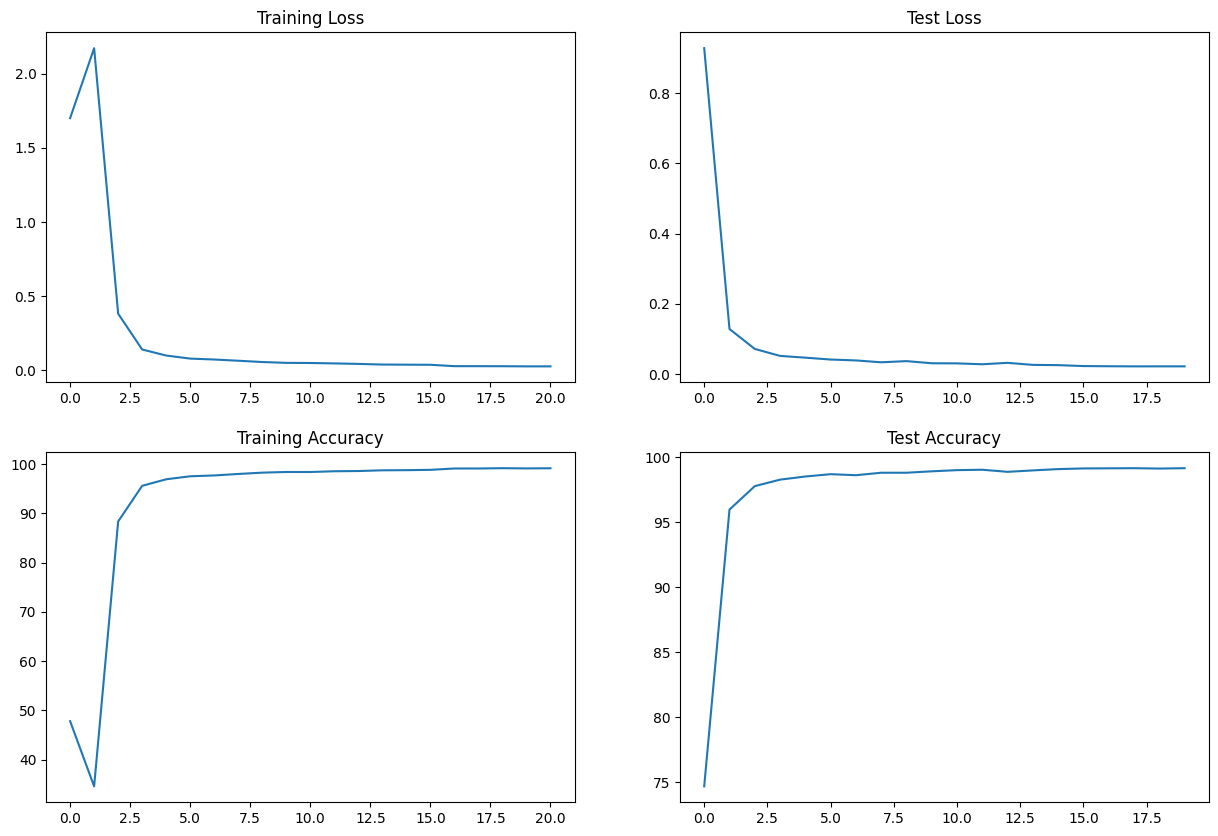

In [13]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")